In [ ]:
file_path = "/content/dataset_v2.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   no_of_locations                          3200 non-null   int64
 1   no_of_conditions                         3200 non-null   int64
 2   enrollment                               3200 non-null   int64
 3   no_of_arms                               3200 non-null   int64
 4   no_of_drug_interventions                 3200 non-null   int64
 5   no_of_behavioral_interventions           3200 non-null   int64
 6   no_of_procedural_interventions           3200 non-null   int64
 7   no_of_biological_interventions           3200 non-null   int64
 8   no_of_device_interventions               3200 non-null   int64
 9   no_of_dietary_interventions              3200 non-null   int64
 10  no_of_other_interventions                3200 non-null   int64
 11  adve

We identified groups of one-hot encoded columns in dataset, like `phase`, `sponsor`, `intervention_model`, and `masking`. Then, we checked each column in these groups to see which one had the most zeros (i.e., the least presence of that category). We decided to drop those columns because they don't add much value. Finally, we dropped the column with the most zeros from each group, simplifying the dataset. This way, you keep the important columns while avoiding redundancy.

In [ ]:
# List of columns that are one-hot encoded
phase_columns = ['phase_EARLY_PHASE1', 'phase_MISSING', 'phase_PHASE1', 'phase_PHASE2', 'phase_PHASE3', 'phase_PHASE4']
sponsor_columns = ['sponsor_FED', 'sponsor_INDIV', 'sponsor_INDUSTRY', 'sponsor_NETWORK', 'sponsor_NIH', 'sponsor_OTHER', 'sponsor_OTHER_GOV']
intervention_model_columns = ['intervention_model_CROSSOVER', 'intervention_model_FACTORIAL', 'intervention_model_PARALLEL',
                              'intervention_model_RANDOMIZED', 'intervention_model_SEQUENTIAL', 'intervention_model_SINGLE_GROUP']
masking_columns = ['masking_DOUBLE', 'masking_NONE', 'masking_QUADRUPLE', 'masking_SINGLE', 'masking_TRIPLE']

# Combine these lists into a dictionary for easy looping
columns_dict = {
    'phase': phase_columns,
    'sponsor': sponsor_columns,
    'intervention_model': intervention_model_columns,
    'masking': masking_columns
}

# Function to drop the column with the most zeros from each one-hot encoded set
def drop_most_zeros_column(df, columns_dict):
    columns_to_drop = []

    for group, cols in columns_dict.items():
        # Get the count of 0s and 1s for each column in the group
        zero_count = (df[cols] == 0).sum()
        one_count = (df[cols] == 1).sum()

        # Create a DataFrame to check zeros and ones for each column in the group
        zero_one_count = pd.DataFrame({
            'zeros': zero_count,
            'ones': one_count,
            'total': zero_count + one_count,
            'zero_percentage': (zero_count / (zero_count + one_count)) * 100,
            'one_percentage': (one_count / (zero_count + one_count)) * 100
        })

        # Sort by the percentage of zeros
        sorted_by_zeros = zero_one_count.sort_values(by='zero_percentage', ascending=False)

        # Identify the column to drop (column with the most zeros)
        column_to_drop = sorted_by_zeros.index[0]  # Column with the highest percentage of zeros
        columns_to_drop.append(column_to_drop)

        # Optional: Drop the column from the dataframe
        df = df.drop(columns=[column_to_drop])
        print(f"Dropped column: {column_to_drop} from {group} group.")

    return df, columns_to_drop

# Call the function to drop columns with most zeros
df, dropped_columns = drop_most_zeros_column(df, columns_dict)

# Print the columns dropped
print("Dropped columns:", dropped_columns)


Dropped column: phase_EARLY_PHASE1 from phase group.
Dropped column: sponsor_NETWORK from sponsor group.
Dropped column: intervention_model_RANDOMIZED from intervention_model group.
Dropped column: masking_SINGLE from masking group.
Dropped columns: ['phase_EARLY_PHASE1', 'sponsor_NETWORK', 'intervention_model_RANDOMIZED', 'masking_SINGLE']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   no_of_locations                          3200 non-null   int64
 1   no_of_conditions                         3200 non-null   int64
 2   enrollment                               3200 non-null   int64
 3   no_of_arms                               3200 non-null   int64
 4   no_of_drug_interventions                 3200 non-null   int64
 5   no_of_behavioral_interventions           3200 non-null   int64
 6   no_of_procedural_interventions           3200 non-null   int64
 7   no_of_biological_interventions           3200 non-null   int64
 8   no_of_device_interventions               3200 non-null   int64
 9   no_of_dietary_interventions              3200 non-null   int64
 10  no_of_other_interventions                3200 non-null   int64
 11  adve

In [ ]:
df.describe()

,no_of_locations,no_of_conditions,enrollment,no_of_arms,no_of_drug_interventions,no_of_behavioral_interventions,no_of_procedural_interventions,no_of_biological_interventions,no_of_device_interventions,no_of_dietary_interventions,...,intervention_model_PARALLEL,intervention_model_SEQUENTIAL,intervention_model_SINGLE_GROUP,masking_DOUBLE,masking_NONE,masking_QUADRUPLE,masking_TRIPLE,male,female,trail_length
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,...,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,23.586250,1.472813,323.786563,2.671250,2.062187,0.135937,0.022500,0.044375,0.071875,0.067500,...,0.709063,0.011875,0.085625,0.269375,0.411562,0.155938,0.085312,0.985000,0.954063,1632.721875
std,68.603855,0.932822,1232.006598,1.535264,1.877344,0.491843,0.198761,0.470346,0.336146,0.373982,...,0.454266,0.108340,0.279853,0.443704,0.492194,0.362853,0.279390,0.121571,0.209382,1209.834071
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,738.750000
50%,1.000000,1.000000,85.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1395.000000
75%,13.250000,2.000000,281.250000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2320.750000
max,1242.000000,14.000000,37134.000000,19.000000,30.000000,5.000000,4.000000,18.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6903.000000


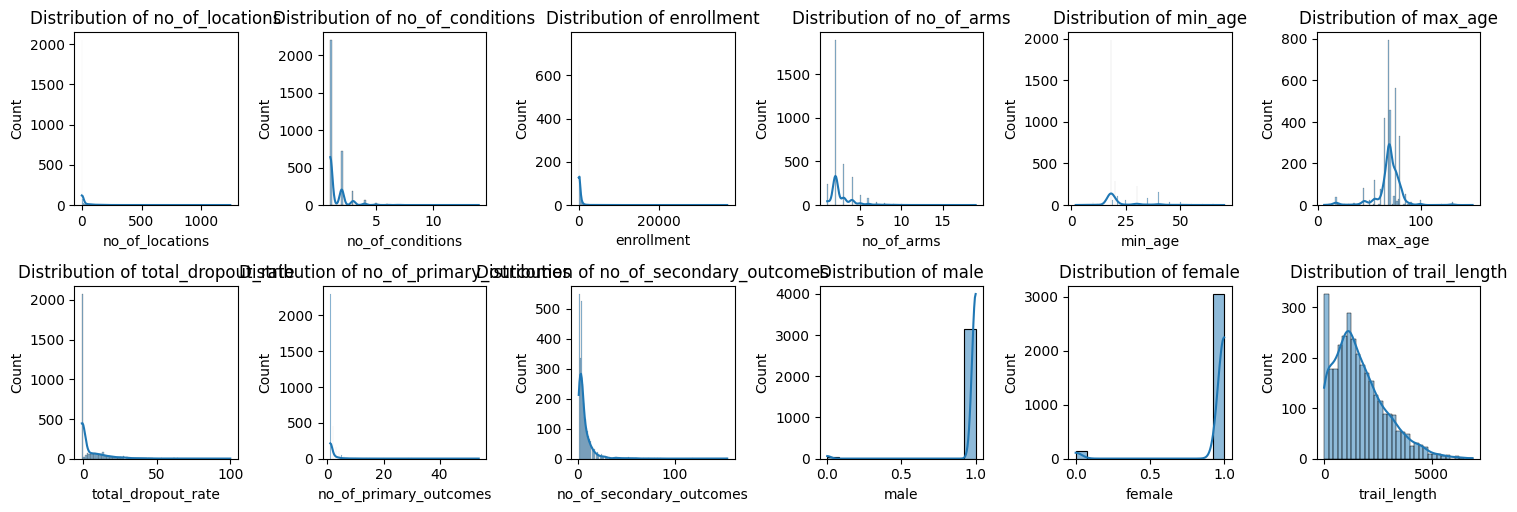

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical features in your dataset
num_features = [
    'no_of_locations', 'no_of_conditions', 'enrollment', 'no_of_arms', 'min_age', 'max_age', 'total_dropout_rate',
    'no_of_primary_outcomes', 'no_of_secondary_outcomes', 'male', 'female', 'trail_length'
]

# Set up the plot grid
plt.figure(figsize=(15, 20))

# Loop through each numerical feature and plot the distribution
for i, feature in enumerate(num_features, 1):
    plt.subplot(8, 6, i)  # Create a grid with 8 rows and 6 columns
    sns.histplot(df[feature], kde=True)  # Plot histogram with KDE for smooth curve
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()


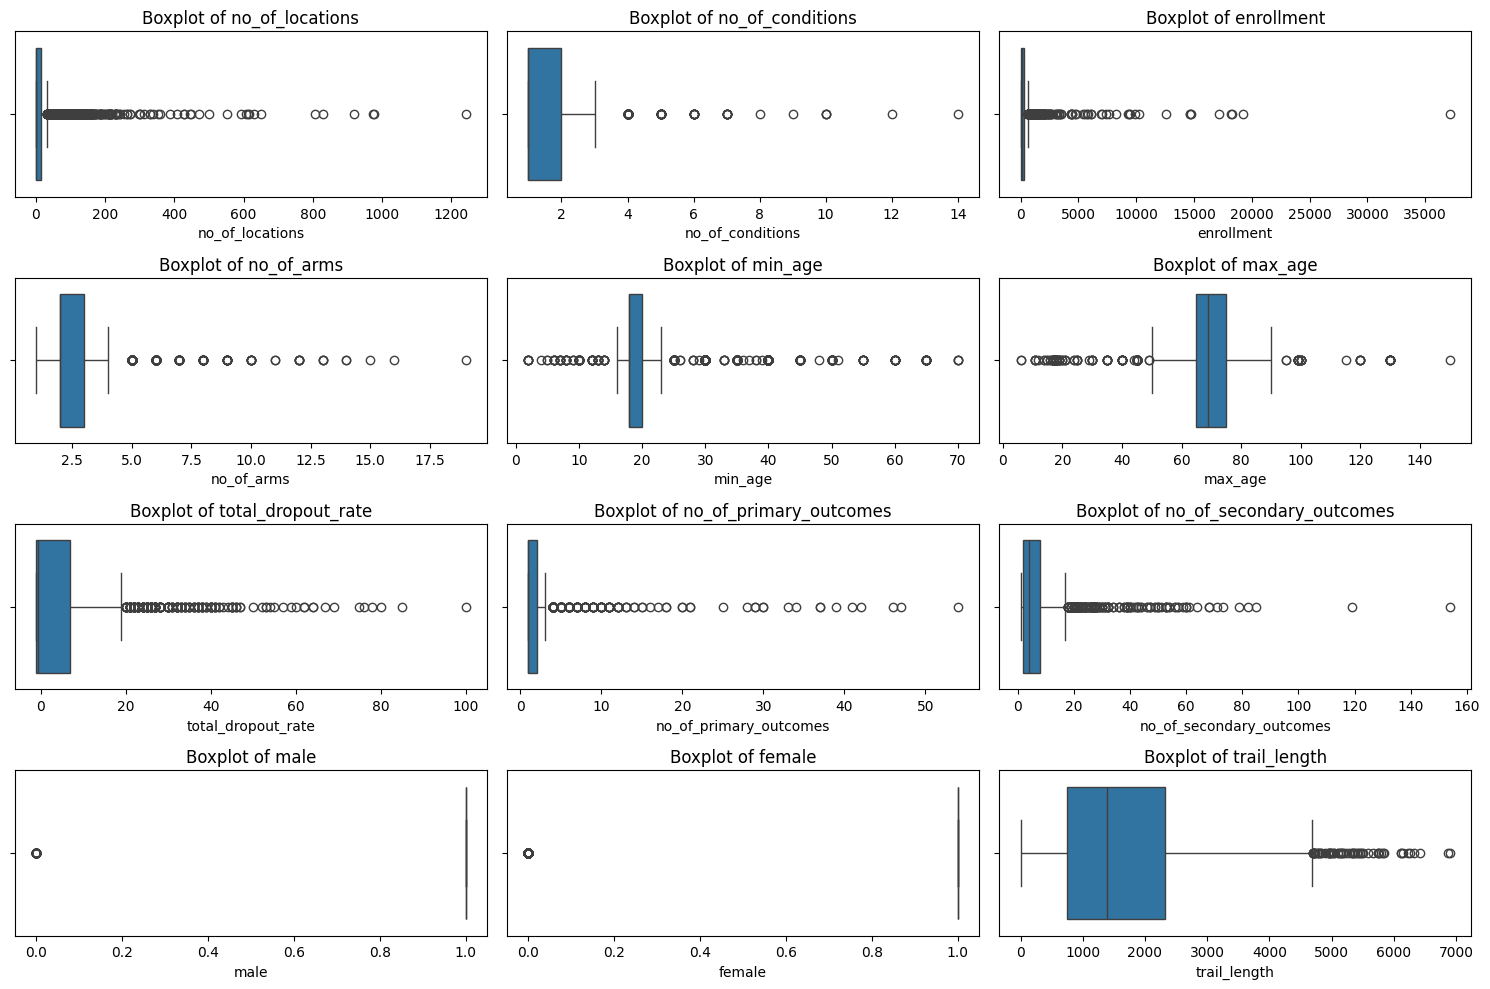

In [ ]:
# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop through each numerical feature and create a boxplot
for i, feature in enumerate(num_features, 1):
    plt.subplot(4, 3, i)  # Create a grid with 4 rows and 3 columns
    sns.boxplot(x=df[feature])  # Create the boxplot
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

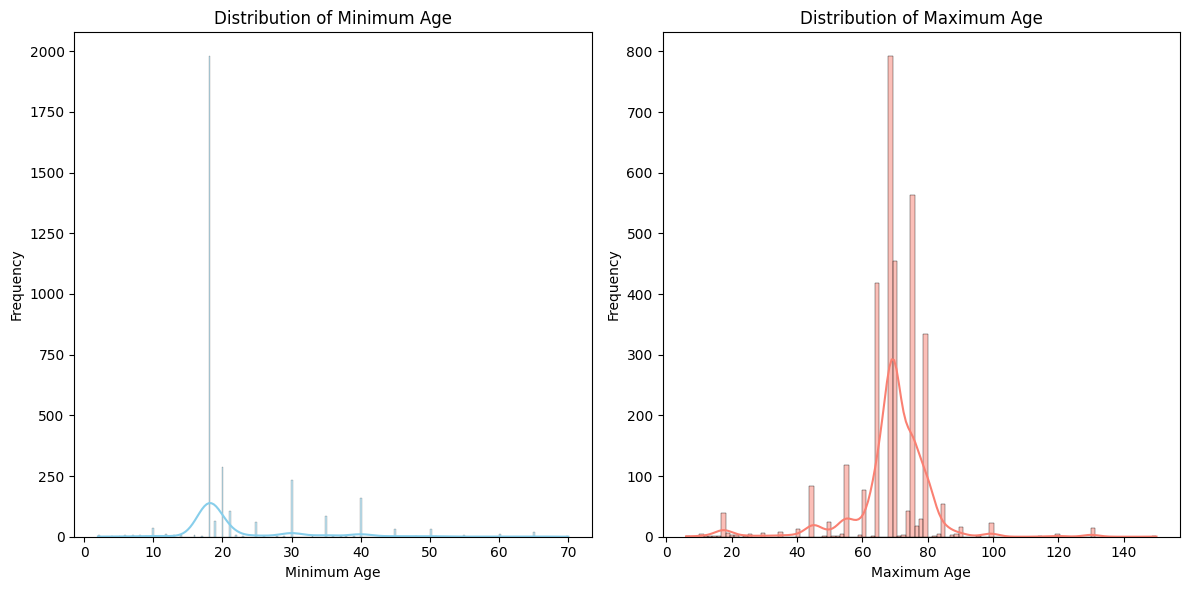

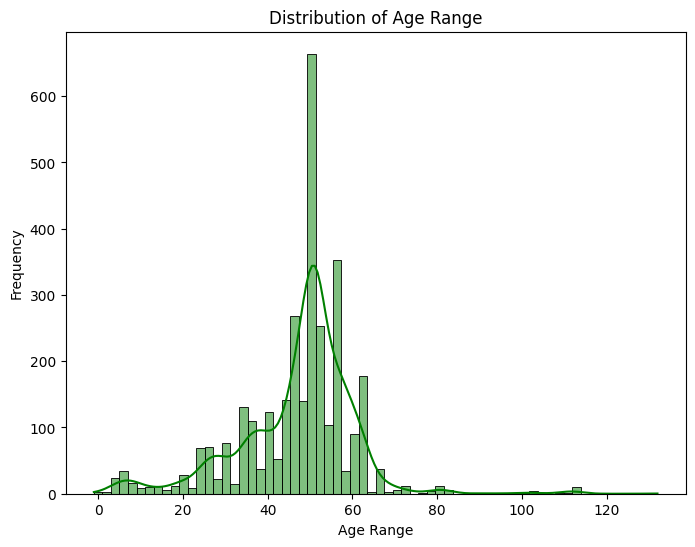

In [ ]:
# Plotting the distribution of 'min_age' and 'max_age'
plt.figure(figsize=(12, 6))

# Subplot for 'min_age'
plt.subplot(1, 2, 1)
sns.histplot(df['min_age'], kde=True, color='skyblue')
plt.title('Distribution of Minimum Age')
plt.xlabel('Minimum Age')
plt.ylabel('Frequency')

# Subplot for 'max_age'
plt.subplot(1, 2, 2)
sns.histplot(df['max_age'], kde=True, color='salmon')
plt.title('Distribution of Maximum Age')
plt.xlabel('Maximum Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate the age range and visualize it
df['age_range'] = df['max_age'] - df['min_age']

# Plot the distribution of age range
plt.figure(figsize=(8, 6))
sns.histplot(df['age_range'], kde=True, color='green')
plt.title('Distribution of Age Range')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.drop(columns=['age_range'], inplace=True)

We identified some highly correlated features (correlation > 0.8) in the dataset, which could introduce multicollinearity. However, we'll proceed without dropping them since our models (e.g., tree-based algorithms) are generally robust to multicollinearity. Keeping all features allows us to capture more information and flexibility for future analysis. We'll monitor model performance and adjust if needed.

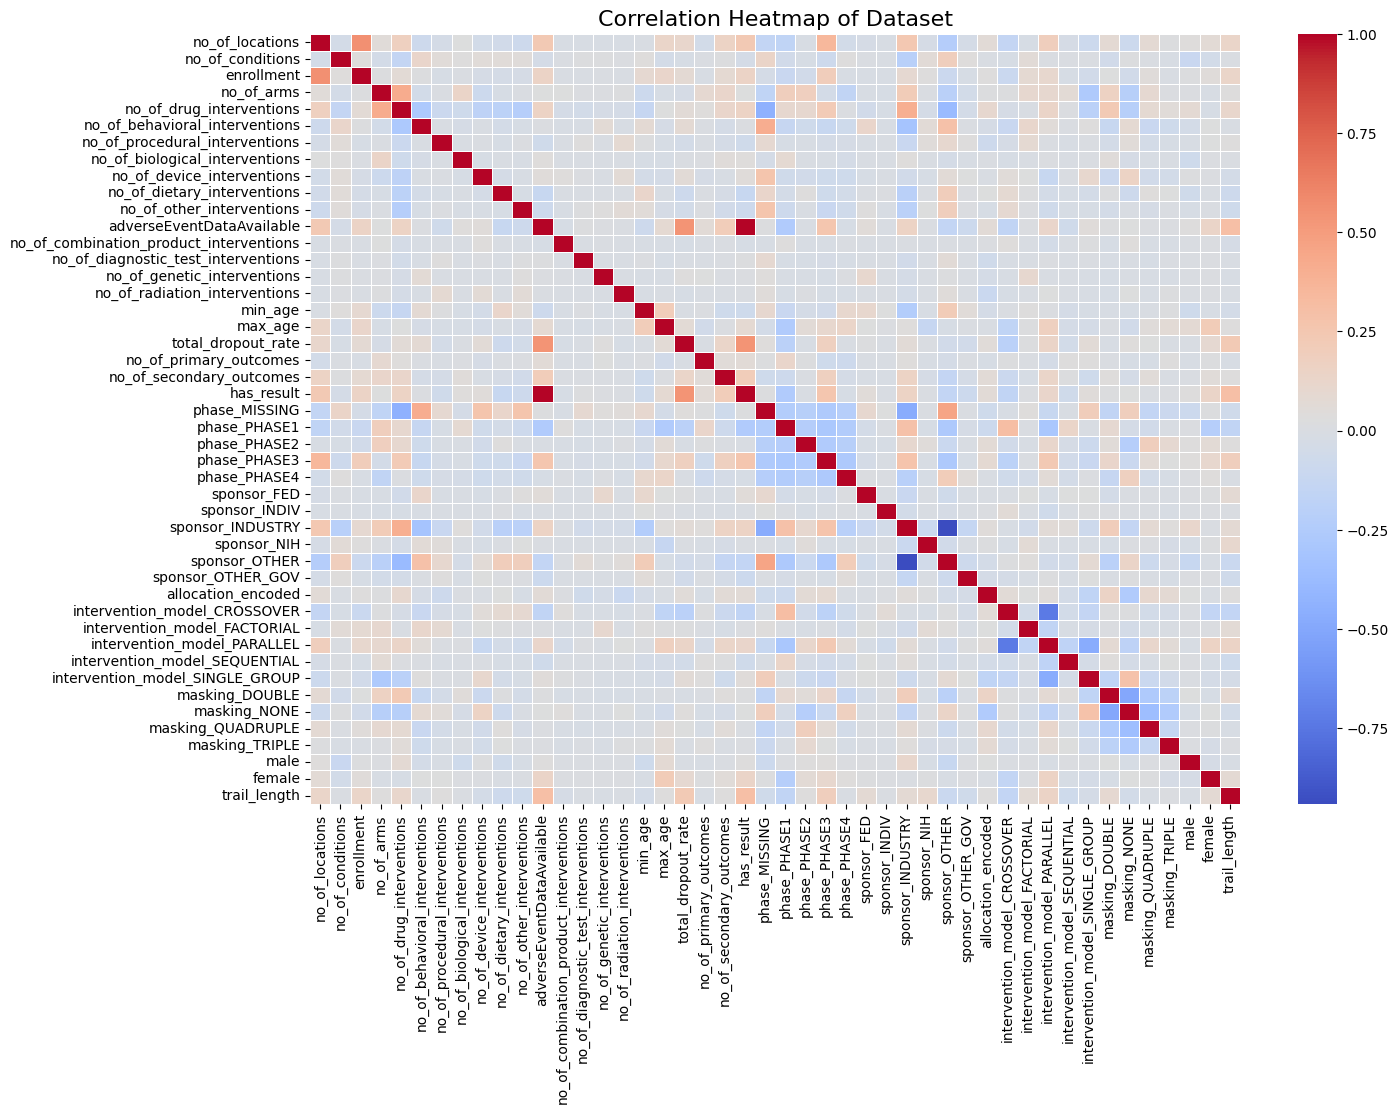

In [ ]:
# Generate a correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix,
            annot=False,  # Set to True if you want to display correlation values
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap of Dataset", fontsize=16)

# Display the heatmap
plt.show()


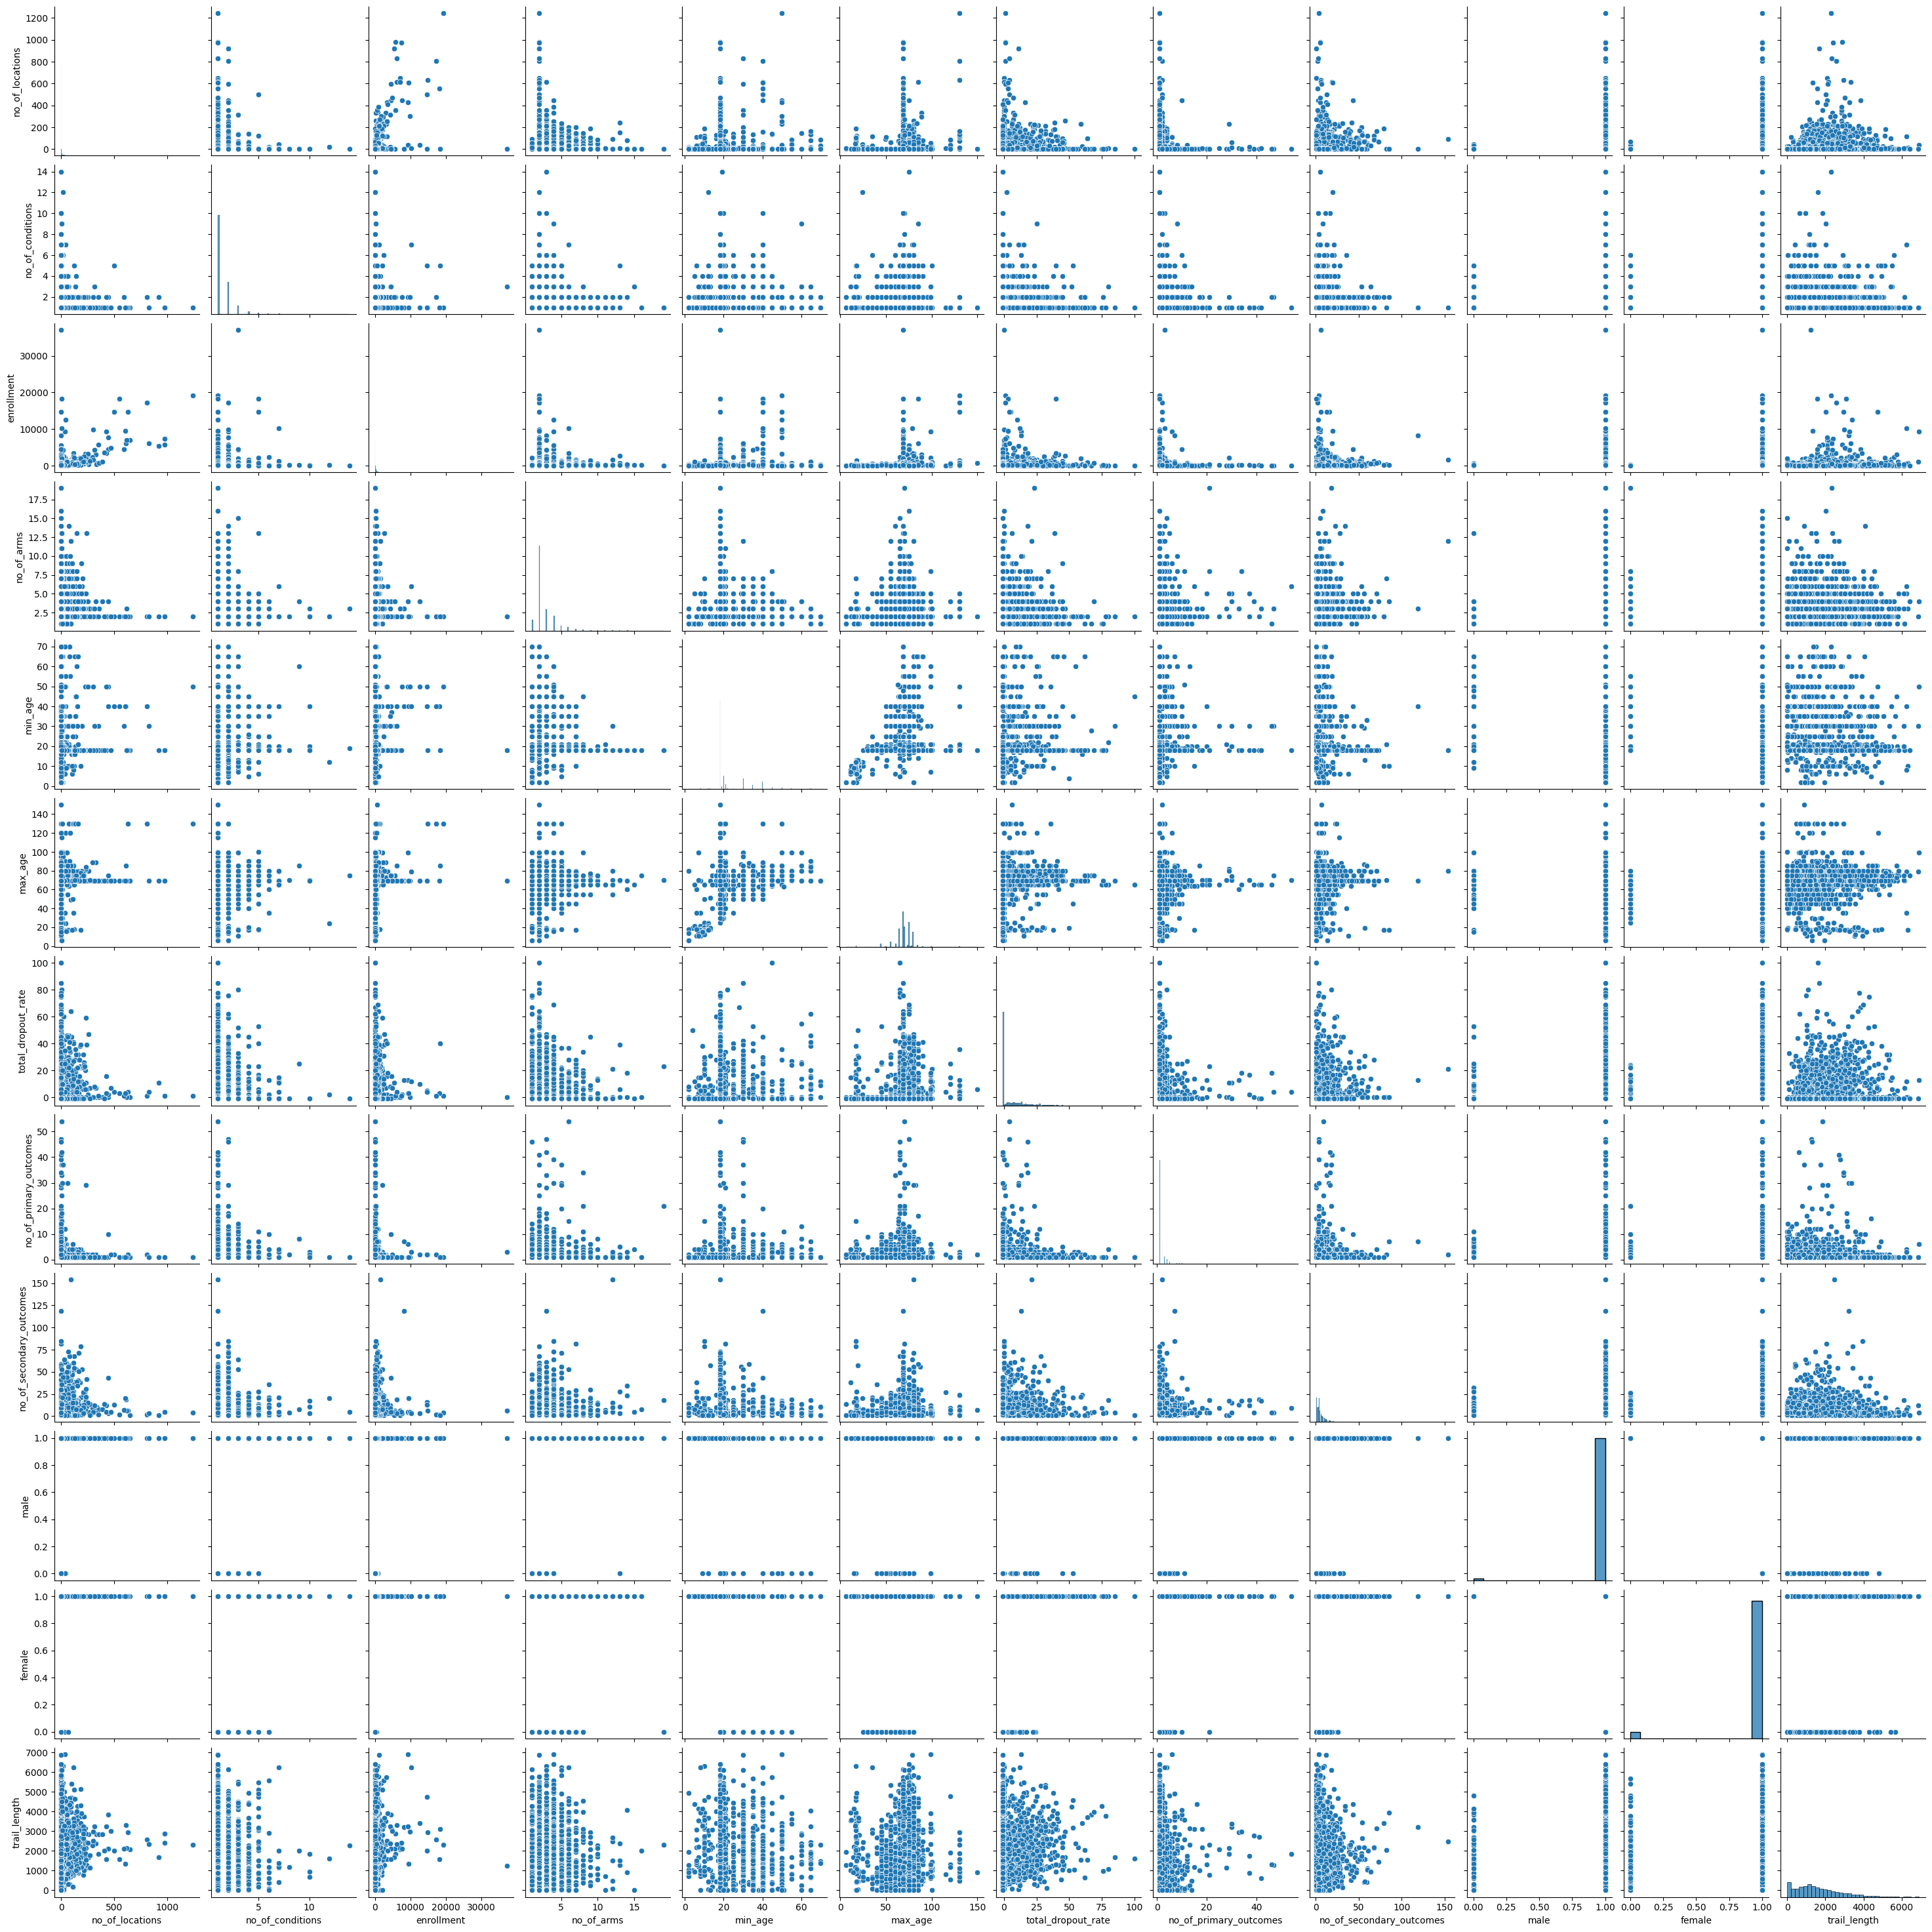

In [ ]:
sns.pairplot(df[num_features])
plt.show()

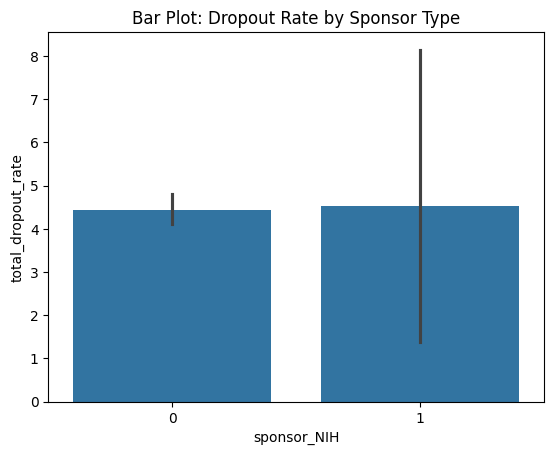

In [ ]:
sns.barplot(x='sponsor_NIH', y='total_dropout_rate', data=df)
plt.title('Bar Plot: Dropout Rate by Sponsor Type')
plt.show()

Based on this plot, we can conclude that there is no significant difference in the total dropout rate between NIH-sponsored and non-NIH-sponsored clinical trials. Both types of sponsors seem to have similar levels of participant dropout.

<ipython-input-21-1096e6c3923a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_dropout_by_sponsor.index, y=avg_dropout_by_sponsor.values, palette='viridis')


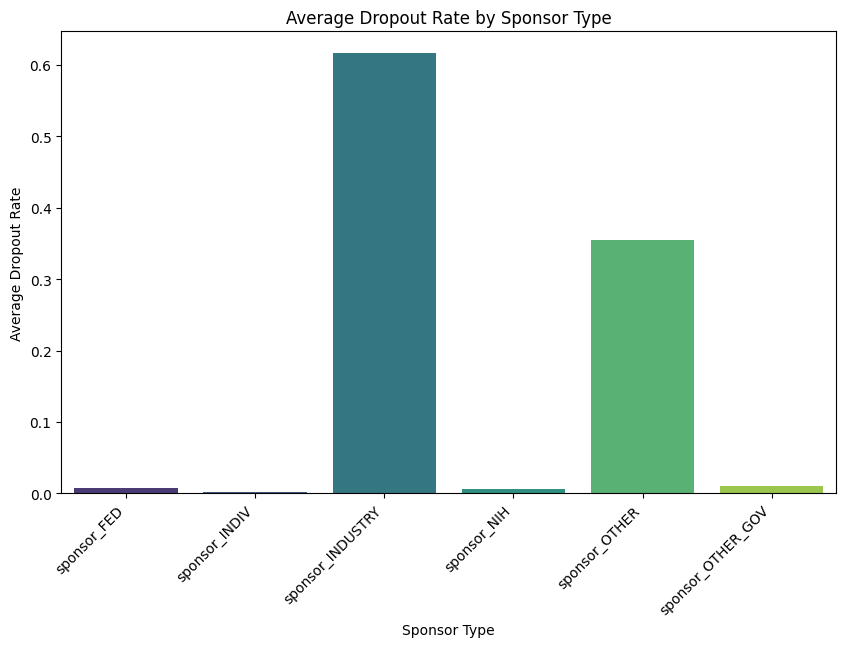

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average dropout rate by sponsor type (group by sponsor columns)
sponsor_columns = [
    'sponsor_FED', 'sponsor_INDIV', 'sponsor_INDUSTRY',
    'sponsor_NIH', 'sponsor_OTHER', 'sponsor_OTHER_GOV'
]

# Create a DataFrame that holds the average dropout rate for each sponsor type
avg_dropout_by_sponsor = df[sponsor_columns + ['total_dropout_rate']].mean()

# Remove the 'total_dropout_rate' column to just keep sponsor types
avg_dropout_by_sponsor = avg_dropout_by_sponsor.drop('total_dropout_rate')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_dropout_by_sponsor.index, y=avg_dropout_by_sponsor.values, palette='viridis')
plt.title('Average Dropout Rate by Sponsor Type')
plt.xlabel('Sponsor Type')
plt.ylabel('Average Dropout Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Features (independent variables) and target (dependent variable)
X = df.drop(columns=['has_result'])
y = df['has_result']

# Normalize the features (Chi-Square requires non-negative values)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Compute Chi-Square scores and corresponding p-values
chi_scores, p_values = chi2(X_scaled, y)

# Display the Chi-Square scores and p-values for each feature
feature_names = X.columns
for feature, score, p_value in zip(feature_names, chi_scores, p_values):
    print(f"Feature: {feature}, Chi-Square Score: {score:.2f}, p-value: {p_value:.4f}")


Feature: no_of_locations, Chi-Square Score: 30.04, p-value: 0.0000
Feature: no_of_conditions, Chi-Square Score: 0.58, p-value: 0.4455
Feature: enrollment, Chi-Square Score: 8.82, p-value: 0.0030
Feature: no_of_arms, Chi-Square Score: 0.14, p-value: 0.7085
Feature: no_of_drug_interventions, Chi-Square Score: 4.23, p-value: 0.0397
Feature: no_of_behavioral_interventions, Chi-Square Score: 0.10, p-value: 0.7477
Feature: no_of_procedural_interventions, Chi-Square Score: 5.56, p-value: 0.0184
Feature: no_of_biological_interventions, Chi-Square Score: 1.41, p-value: 0.2353
Feature: no_of_device_interventions, Chi-Square Score: 2.35, p-value: 0.1252
Feature: no_of_dietary_interventions, Chi-Square Score: 19.74, p-value: 0.0000
Feature: no_of_other_interventions, Chi-Square Score: 6.56, p-value: 0.0104
Feature: adverseEventDataAvailable, Chi-Square Score: 1597.00, p-value: 0.0000
Feature: no_of_combination_product_interventions, Chi-Square Score: 0.67, p-value: 0.4142
Feature: no_of_diagnostic

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   no_of_locations                          3200 non-null   int64
 1   no_of_conditions                         3200 non-null   int64
 2   enrollment                               3200 non-null   int64
 3   no_of_arms                               3200 non-null   int64
 4   no_of_drug_interventions                 3200 non-null   int64
 5   no_of_behavioral_interventions           3200 non-null   int64
 6   no_of_procedural_interventions           3200 non-null   int64
 7   no_of_biological_interventions           3200 non-null   int64
 8   no_of_device_interventions               3200 non-null   int64
 9   no_of_dietary_interventions              3200 non-null   int64
 10  no_of_other_interventions                3200 non-null   int64
 11  adve

In [ ]:
# List of columns representing different interventions
intervention_columns = [
    'no_of_drug_interventions',
    'no_of_behavioral_interventions',
    'no_of_procedural_interventions',
    'no_of_biological_interventions',
    'no_of_device_interventions',
    'no_of_dietary_interventions',
    'no_of_other_interventions',
    'no_of_combination_product_interventions',
    'no_of_diagnostic_test_interventions',
    'no_of_genetic_interventions',
    'no_of_radiation_interventions'
]

# Calculate total number of interventions
df['no_of_interventions'] = df[intervention_columns].sum(axis=1)

# Calculate number of types of interventions (count of non-zero intervention types)
df['no_of_types_of_interventions'] = (df[intervention_columns] > 0).sum(axis=1)

In [ ]:
# Drop original intervention columns
df = df.drop(columns=intervention_columns)

**Feature Importance Based on Chi-Square Test**

* **Highly Significant Features:** `adverseEventDataAvailable`, `total_dropout_rate`, `phase_PHASE1`, `phase_PHASE3`, `sponsor_INDUSTRY`, `sponsor_OTHER`, `sponsor_OTHER_GOV`, `intervention_model_CROSSOVER`, `intervention_model_PARALLEL`, `intervention_model_SEQUENTIAL`, `trail_length`
* **Moderately Significant Features:** `no_of_locations`, `enrollment`, `no_of_secondary_outcomes`, `sponsor_FED`, `intervention_model_SINGLE_GROUP`
* **Less Significant Features:** Remaining features with higher p-values


In [ ]:
# Features (independent variables) and target (dependent variable)
X = df.drop(columns=['has_result'])
y = df['has_result']

# Normalize the features (Chi-Square requires non-negative values)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Compute Chi-Square scores and corresponding p-values
chi_scores, p_values = chi2(X_scaled, y)

# Display the Chi-Square scores and p-values for each feature
feature_names = X.columns
for feature, score, p_value in zip(feature_names, chi_scores, p_values):
    print(f"Feature: {feature}, Chi-Square Score: {score:.2f}, p-value: {p_value:.4f}")

Feature: no_of_locations, Chi-Square Score: 30.04, p-value: 0.0000
Feature: no_of_conditions, Chi-Square Score: 0.58, p-value: 0.4455
Feature: enrollment, Chi-Square Score: 8.82, p-value: 0.0030
Feature: no_of_arms, Chi-Square Score: 0.14, p-value: 0.7085
Feature: adverseEventDataAvailable, Chi-Square Score: 1597.00, p-value: 0.0000
Feature: min_age, Chi-Square Score: 1.05, p-value: 0.3062
Feature: max_age, Chi-Square Score: 0.39, p-value: 0.5317
Feature: total_dropout_rate, Chi-Square Score: 171.87, p-value: 0.0000
Feature: no_of_primary_outcomes, Chi-Square Score: 2.72, p-value: 0.0990
Feature: no_of_secondary_outcomes, Chi-Square Score: 12.18, p-value: 0.0005
Feature: phase_MISSING, Chi-Square Score: 1.07, p-value: 0.3013
Feature: phase_PHASE1, Chi-Square Score: 165.75, p-value: 0.0000
Feature: phase_PHASE2, Chi-Square Score: 0.02, p-value: 0.8987
Feature: phase_PHASE3, Chi-Square Score: 163.17, p-value: 0.0000
Feature: phase_PHASE4, Chi-Square Score: 1.13, p-value: 0.2885
Feature: 

In [ ]:
df.to_csv('final_dataset.csv', index=False)